# Analysis and Insights of Spotify Chart Data

In [2]:
import csv
import pprint
import pandas as pd
import math
import matplotlib.pyplot as plt
import analysis
import seaborn as sns
import statistics

Spotify does not allow their data from their API to be used for any sort of model creation or machine-learning, so the majority of the insights I will be discussing have to do with the finding and visualizing insights based around **descriptive statistics**.

## USA Chart Analysis

In [3]:
df = pd.read_csv('/Users/prithvivenkataswamy/Documents/Spotify-Exploration/data/usa/usa.csv')
pd.set_option('display.max_columns', None)

In [4]:
unique_genres = analysis.count_unique_genres(df)
#pprint.pprint(unique_genres)

In [18]:
#analysis.plot_bar_chart(unique_genres, bar_width = 1.5)

In [5]:
#corr_matrix = df.corr()

#plt.figure(figsize=(10, 10))  # Optional: Adjust the figure size for better visualization
#sns.heatmap(corr_matrix, annot=True,  linewidths=0.2)
#plt.title('Correlation Matrix')
#plt.show()

### Instrumentalness

count    50.000000
mean      0.015581
std       0.090829
min       0.000000
25%       0.000000
50%       0.000001
75%       0.000031
max       0.629000
Name: instrumentalness, dtype: float64


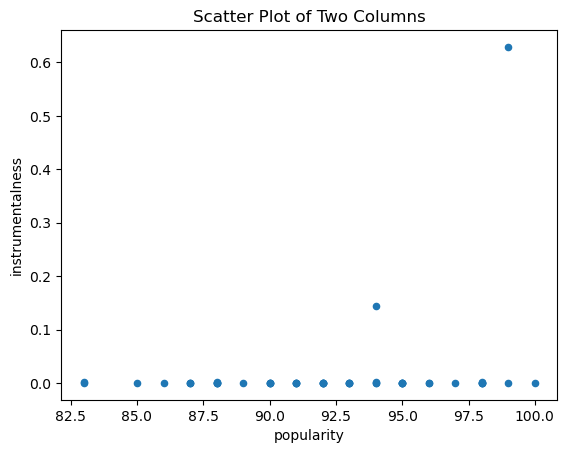

In [8]:
stats = df.describe()['instrumentalness']
print(stats)
# Scatter plot
df.plot(x='popularity', y='instrumentalness', kind='scatter')

# Set plot labels and title (optional)
plt.xlabel('popularity')
plt.ylabel('instrumentalness')
plt.title('Scatter Plot of Two Columns')

# Display the plot
plt.show()

After noticing that 'instrumentalness' has the strongest correlation with popularity, I looked at the descriptive statistics for the column as well. Looking at the 25% and 50% percentile lead me to look back at the dataframe where I realized an **overwhelmingly majority of the songs have a 0.000 value for 'instrumentalness'**. According to Spotify's API documentation, a value of 0.000 for 'instrumentalness' means the song contains vocals (while 1.00 means the song is fully 'instrumental'). 

### Musical Keys

count    50.000000
mean      0.015581
std       0.090829
min       0.000000
25%       0.000000
50%       0.000001
75%       0.000031
max       0.629000
Name: instrumentalness, dtype: float64


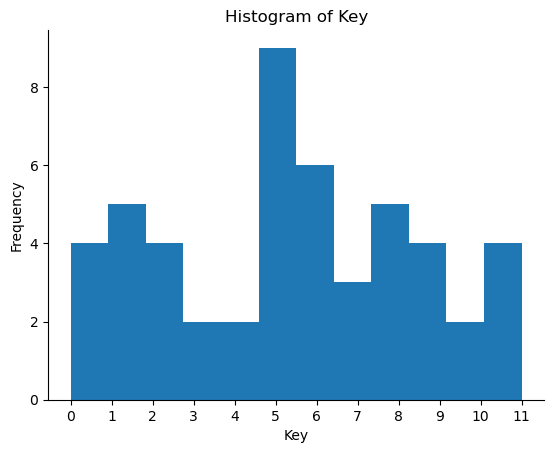

In [5]:
stats = df.describe()['instrumentalness']
print(stats)

analysis.plot_histogram(df['key'], 'Key')

The most common key for the US charts is key 5 which is E (this could be E major or E minor). I've taken the following descriptive feelings for each of these keys from this [site](https://wmich.edu/mus-theo/courses/keys.html#:~:text=Noisy%20shouts%20of%20joy%2C%20laughing,delight%20lies%20in%20E%20Major.)

**E Major** <br>
Noisy shouts of joy, laughing pleasure and not yet complete, full delight lies in E Major.

**E minor** <br>
Naïve, womanly innocent declaration of love, lament without grumbling; sighs accompanied by few tears; this key speaks of the imminent hope of resolving in the pure happiness of C major.

Let's see what songs are in E major or E minor...

In [38]:
#E major
filtered_rows = df.loc[(df['key'] == 5) & (df['mode'] == 1)]
filtered_rows.iloc[:,0:4]

,name,artist_id,track_id,track_name
1,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,3k79jB4aGmMDUQzEwa46Rz,vampire
21,PinkPantheress,78rUTD7y6Cy67W1RVzYs7t,6AQbmUe0Qwf5PZnt4HmTXv,Boy's a liar Pt. 2
45,SZA,7tYKF4w9nC0nq9CsPZTHyP,4iZ4pt7kvcaH6Yo8UoZ4s2,SOS


In [39]:
#E minor
filtered_rows = df.loc[(df['key'] == 5) & (df['mode'] == 0)]
filtered_rows.iloc[:,0:4]

,name,artist_id,track_id,track_name
5,Eslabon Armado,0XeEobZplHxzM9QzFQWLiR,3qQbCzHBycnDpGskqOWY0E,DESVELADO
14,NewJeans,6HvZYsbFfjnjFrWF950C9d,5sdQOyqq2IDhvmx2lHOpwd,NewJeans 'Super Shy'
22,Peso Pluma,12GqGscKJx3aE4t07u7eVZ,7mXuWTczZNxG5EDcjFEuJR,GÉNESIS
27,Fuerza Regida,0ys2OFYzWYB5hRDLCsBqxt,368eeEO3Y2uZUQ6S5oIjcu,TQM
37,Bizarrap,716NhGYqD1jl2wI1Qkgq36,5AqiaZwhmC6dIbgWrD5SzV,"Peso Pluma: Bzrp Music Sessions, Vol. 55"
38,Troye Sivan,3WGpXCj9YhhfX11TToZcXP,3xIMkM5LgbVDkpO74O3Np3,Rush


### Duration

count        50.00000
mean     203207.54000
std       53284.82269
min      109750.00000
25%      166079.00000
50%      196241.50000
75%      222157.50000
max      386907.00000
Name: duration_ms, dtype: float64
Mode: 125040 seconds


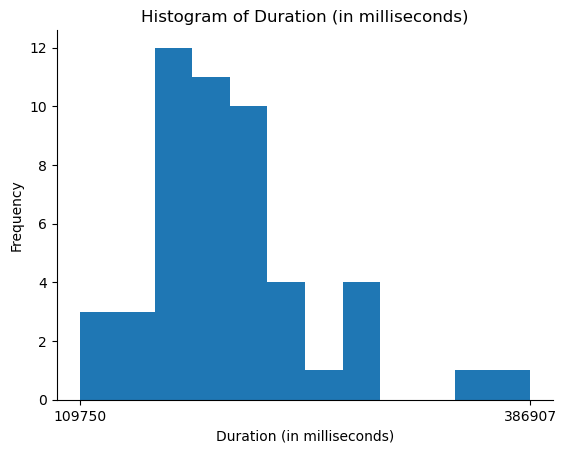

In [3]:
stats = df.describe()['duration_ms']
print(stats)
mode = statistics.mode(df['duration_ms'])
print(f'Mode: {mode} seconds')

analysis.plot_histogram(df['duration_ms'], 'Duration (in milliseconds)', extremes=True)

The histogram shows the majority of the top tracks in the United States are on the shorter side with the mode being around 125040 milliseconds (or a little over 2 minutes). <br>

Let's see what songs on the US charts are the outliers closer to the maximum duration...

In [6]:
filtered_rows = df.loc[(df['duration_ms'] >325000)]
filtered_rows.iloc[:,0:4]

,name,artist_id,track_id,track_name
44,Taylor Swift,06HL4z0CvFAxyc27GXpf02,3sW3oSbzsfecv9XoUdGs7h,Speak Now (Taylor's Version)
49,Kendrick Lamar,2YZyLoL8N0Wb9xBt1NhZWg,2HbKqm4o0w5wEeEFXm2sD4,"good kid, m.A.A.d city"
